In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
import numpy as np
from decimal import Decimal
import random
from collections import Counter

# Probability

## Challenge 1
There is a box with 10 white balls, 12 red balls and 8 black balls. Calculate the probability of:
* Taking a white ball out.
* Taking a white ball on first extraction and a black ball out on second extraction without replacing the first one.
* Taking a white ball on first extraction and a black ball out on second extraction replacing the first one.
* Taking 3 balls and them being all different colours.

In [2]:
n_white_balls = 10
n_red_balls = 12
n_black_balls = 8

total_balls = n_white_balls + n_red_balls + n_black_balls

In [3]:
#  Taking a white ball out.
print(n_white_balls / total_balls)

0.3333333333333333


In [4]:
#  Taking a white ball on first extraction and a black ball out on second extraction without replacing the first one.
print((n_white_balls / total_balls) * (n_black_balls / (total_balls - n_white_balls)))

0.13333333333333333


In [5]:
#  Taking a white ball on first extraction and a black ball out on second extraction replacing the first one.
print((n_white_balls / total_balls) *  (n_black_balls / total_balls))

0.08888888888888888


In [6]:
#  Taking 3 balls and them being all different colours.
print((n_white_balls * n_red_balls * n_black_balls)/((total_balls) * (total_balls-1) * (total_balls-2)))

0.03940886699507389


## Challenge 2

You want to go on picnic on Saturday. You hate rain, and would know to plan your weekend. To help you make a decision, you gather the following data about rainy days:

* 40% of all days are cloudy.
* About 50% of cloudy days are rainy. 
* About 20% of non-cloudy days are rainy.

What is the chance of rain during next Saturday?

In [16]:
probability = 0.4 * 0.5 + 0.6 * 0.2
print(f"{probability:.2%}")

32.00%


## Challenge 3

A and B are events of a probability such that $P(A) = 0.3$, $P(B) = 0.6$ and $P(A \cap B) = 0.1$

Which of the following statements are true?  
**HINT: draw a big Venn Diagram by your side**  
* $P(\overline{A}) = 0.7$
* $P(A \cup B) = 0.6$
* $P(A \cap \overline{B}) = 0.2$
* $P(A \cup \overline{A}) = 1$  
* $P(A \cap (B \cup \overline{B})) = 0.4$
* $P(\overline{A} \cap \overline{B}) = 0.3$
* $P(\overline{A \cap B}) = 0.9$

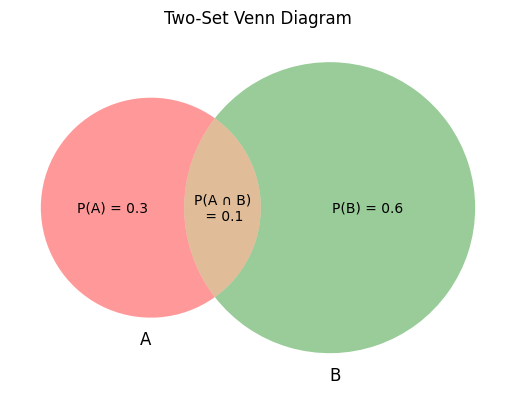

In [22]:
# Define the set sizes
venn = venn2(subsets=(30, 60, 10), set_labels=('A', 'B'))

# Customize appearance (optional)
venn.get_label_by_id('10').set_text('P(A) = 0.3')
venn.get_label_by_id('01').set_text('P(B) = 0.6')
venn.get_label_by_id('11').set_text(f'P(A ∩ B)\n = 0.1')

# Display the Venn diagram
plt.title("Two-Set Venn Diagram")
plt.show()

* $P(\overline{A}) = 0.7$

In [44]:
1 - 0.3 == 0.7

True

* $P(A \cup B) = 0.6$

In [25]:
0.6 + 0.3 - 0.1 == 0.6

False

* $P(A \cap \overline{B}) = 0.2$

In [81]:
0.3 - 0.1 == 0.2

False

In [35]:
round(0.3 - 0.1, 2) == 0.2

True

In [39]:
np.subtract(0.3, 0.1)

np.float64(0.19999999999999998)

In [43]:
Decimal("0.3") - Decimal("0.1") == Decimal("0.2")

True

* $P(A \cup \overline{A}) = 1$  


In [46]:
0.3 + 0.7 == 1

True

* $P(A \cap (B \cup \overline{B})) = 0.4$


In [47]:
0.3 * 1 == 0.4

False

* $P(\overline{A} \cap \overline{B}) = 0.3$


In [58]:
round((1-0.3)*(1-0.6), 2) == 0.3

False

* $P(\overline{A \cap B}) = 0.9$

In [59]:
1 - 0.1 == 0.9

True

## Challenge 4

 * If someone flies to China, the probability of getting Covid is 1%  
 * If someone flies to Italy, the probability of getting Covid is 20%  

I roll 1 dice with numbers 1, 2, 3, 4, 5, 6:  
 * If 1: I fly to Italy
 * If not 1: I fly to China

During my trip, I got Covid. What is the probability that I flew to China?

In [79]:
p_covid_China = 0.01
p_covid_Italy = 0.20
p_fly_Italy = 1 / 6
p_fly_China = 1 - p_fly_Italy

#  test
print(p_fly_Italy + p_fly_China == 1)

True


In [80]:
p_got_covid_China = p_fly_China * p_covid_China
p_got_covid_Italy = p_fly_Italy * p_covid_Italy 
p_got_covid_total = p_got_covid_Italy + p_got_covid_China
p_fly_China_Bayes = p_got_covid_China / p_got_covid_total

print(p_fly_China_Bayes)

0.2


## BONUS

You roll 2 dice. What is the probability that the sum of the numbers is 7? And 8? And 9? Then simulate 10000 times and draw a countplot.

your explanation here

In [83]:
p_dice = 1 / 6
p_dice

0.16666666666666666

In [85]:
combinations_for_seven = set()

for i in range (1, 7):
    tup1 = (i, 7-i)
    tup2 = (7-i, i)
    combinations_for_seven.add(tup1)
    combinations_for_seven.add(tup2)

print(combinations_for_seven)


{(3, 4), (4, 3), (6, 1), (1, 6), (2, 5), (5, 2)}


In [89]:
prob_seven = p_dice * p_dice * len(combinations_for_seven)
prob_seven

0.16666666666666666

In [97]:
combinations_for_eight = set()

for i in range (1, 7):
    if 8-i < 6:
        tup1 = (i, 8-i)
        tup2 = (8-i, i)
        combinations_for_eight.add(tup1)
        combinations_for_eight.add(tup2)

print(combinations_for_eight)

{(4, 4), (6, 2), (2, 6), (5, 3), (3, 5)}


In [98]:
prob_eight = p_dice * p_dice * len(combinations_for_eight)
prob_eight

0.1388888888888889

In [99]:
combinations_for_nine = set()

for i in range (1, 7):
    if 9-i < 6:
        tup1 = (i, 9-i)
        tup2 = (9-i, i)
        combinations_for_nine.add(tup1)
        combinations_for_nine.add(tup2)

print(combinations_for_nine)

{(4, 5), (5, 4), (3, 6), (6, 3)}


In [100]:
prob_nine = p_dice * p_dice * len(combinations_for_nine)
prob_nine

0.1111111111111111

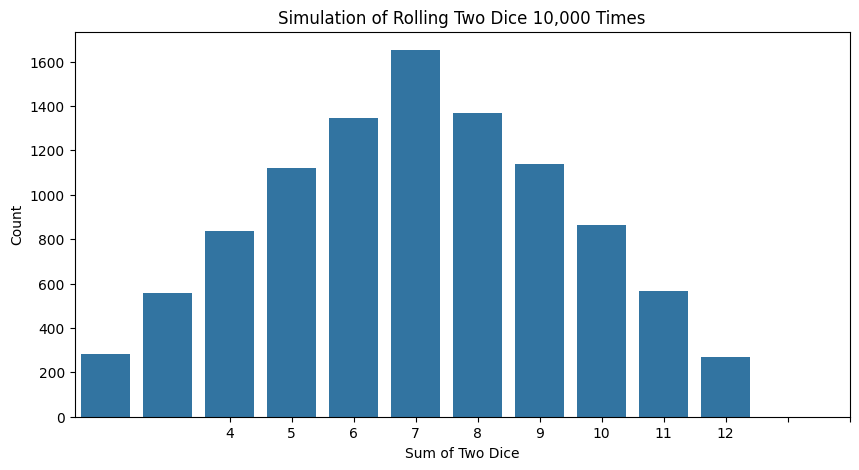

In [107]:
# Simulate rolling two dice 10,000 times
num_simulations = 10000
sum_results = [random.randint(1, 6) + random.randint(1, 6) for _ in range(num_simulations)]

# Count occurrences of each sum
sum_counts = Counter(sum_results)

# Plot the results using a countplot
plt.figure(figsize=(10, 5))
sns.barplot(x=list(sum_counts.keys()), y=list(sum_counts.values()))

plt.xlabel("Sum of Two Dice")
plt.ylabel("Count")
plt.title("Simulation of Rolling Two Dice 10,000 Times")
plt.xticks(range(2, 13))  # Possible sums range from 2 to 12

plt.show()